In [ ]:
#!pip install kaggle pandas numpy seaborn matplotlib scikit-learn nltk gensim transformers torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install -q kaggle nltk gensim transformers scikit-learn seaborn wordcloud

In [ ]:
!pip install wandb

NLP Libraries: nltk (for text processing like tokenization and removing stopwords), gensim (for word embeddings), transformers (for fine-tuning pre-trained models like BERT).

ML Libraries: sklearn (for vectorization, training models, and evaluation), torch (for working with deep learning models like BERT).



In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
import kagglehub

os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
#!kaggle datasets download -d crowdflower/twitter-airline-sentiment --unzip

path = kagglehub.dataset_download('crowdflower/twitter-airline-sentiment')

df = pd.read_csv("Tweets.csv")


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df = df[['text', 'airline_sentiment']]

In [ ]:
df.rename(columns={'text': 'tweet', 'airline_sentiment': 'label'}, inplace=True)

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) #removing urls
    text = re.sub(r'@\w+|\#','', text) #removing mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", '', text) #removing punctuation and special chars (sadece letter ve space kalıyor)
    text = " ".join([word for word in text.split() if word not in stop_words]) #removing stopwords

    return text

df['clean_tweet'] = df['tweet'].apply(preprocess)






In [ ]:
'''
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

df.rename(columns={'text': 'tweet', 'airline_sentiment': 'label'}, inplace=True) #I can delete the third column


def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)

    words = word_tokenize(text)  # tokenize
    words = [word for word in words if word not in stop_words]  #remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  #lemmatize

    return ' '.join(words)


df['clean_tweet'] = df['tweet'].apply(preprocess)
'''


'''
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|\#', '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)

    words = text.split()
    words = [word for word in words if word not in stop_words]

    # First lemmatization, then stemming
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words]

    return " ".join(words)
'''

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


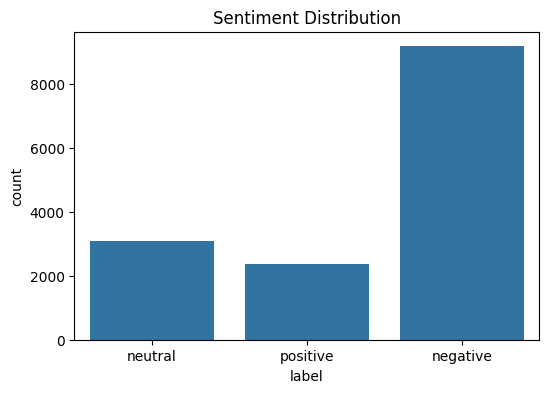

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()



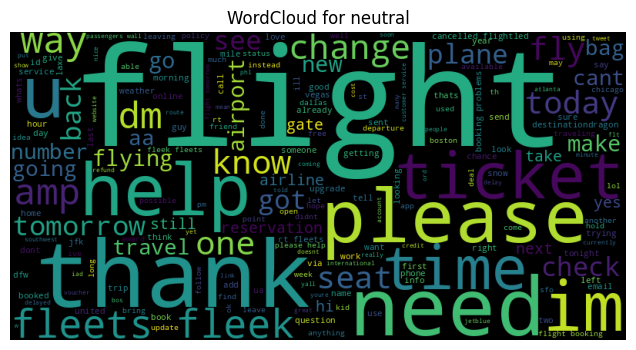

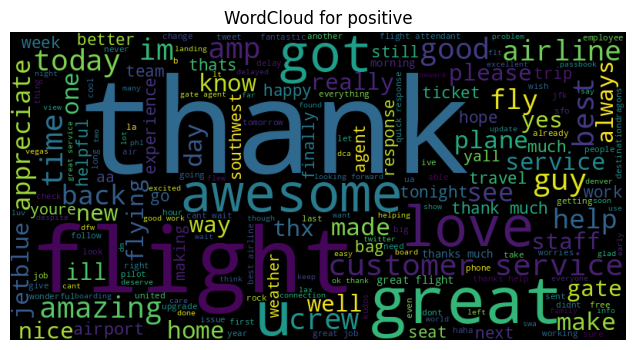

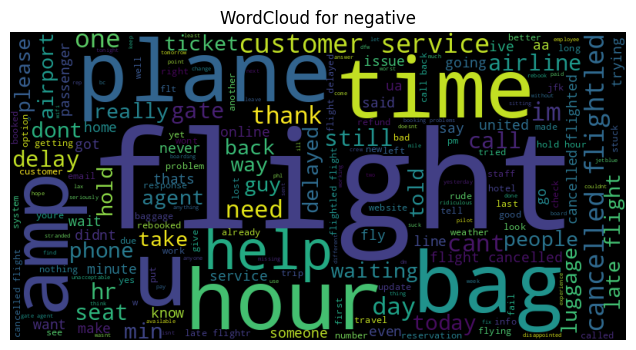

In [ ]:
for sentiment in df.label.unique():
    wc = WordCloud(width=800, height=400).generate(" ".join(df[df.label==sentiment]['clean_tweet']))
    plt.figure(figsize=(10,4))
    plt.imshow(wc)
    plt.title(f"WordCloud for {sentiment}")
    plt.axis("off")
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

In [ ]:
#TF-IDF converts text data into numerical features based on the importance of each word within the doc compared
# to its frequency across all docs

tfidf = TfidfVectorizer(max_features=5000) #değiştirip dene
X_tfidf = tfidf.fit_transform(df['clean_tweet']).toarray() #transforms the text data into a tf-idf matrix



y = df['label'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)



#Balancing the dataset bc there were too many negatives
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#trains the model and predicts sentiment labels on test data
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
#lr.fit(X_train_smote, y_train_smote)
preds = lr.predict(X_test)

print("TF-IDF + Logistic Regression Accuracy:", accuracy_score(y_test, preds))


TF-IDF + Logistic Regression Accuracy: 0.782103825136612


In [ ]:
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, preds))



Classification Report (TF-IDF):
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1835
     neutral       0.66      0.49      0.56       620
    positive       0.83      0.55      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.70      2928
weighted avg       0.78      0.78      0.77      2928



In [ ]:
#Word embeddings are vector representations of words


#ML models cannot work with raw text. They need the text to be converted into numerical data.
#Tokenization helps to break down the text into individual parts (words or subwords) that can be converted into numbers based on context and usage

tokenized = [text.split() for text in df['clean_tweet']]
w2v = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2)

#getting the avg vector for a text
def get_avg_vector(text, model):
    vectors = [model.wv[word] for word in text.split() if word in model.wv] #getting the word vectors for each word in the text
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)


#convert each tweet into an avg vector
X_w2v = np.array([get_avg_vector(text, w2v) for text in df['clean_tweet']])
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, stratify=y, random_state=42)


#Balancing
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


#Window size determines how many words on either side of the target word are considered as context


'\n# SMOTE: Balancing the dataset\nX_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)\n'

In [ ]:
#training logistic reg on word2vec features (categorical, classify sentiments)

lr.fit(X_train, y_train)
#lr.fit(X_train_smote, y_train_smote)

preds = lr.predict(X_test)
print("Word2Vec + Logistic Regression Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report (Word2Vec):")
print(classification_report(y_test, preds))

Word2Vec + Logistic Regression Accuracy: 0.6933060109289617

Classification Report (Word2Vec):
              precision    recall  f1-score   support

    negative       0.69      0.97      0.81      1835
     neutral       0.63      0.18      0.28       620
    positive       0.77      0.29      0.42       473

    accuracy                           0.69      2928
   macro avg       0.70      0.48      0.50      2928
weighted avg       0.69      0.69      0.63      2928



In [ ]:
fasttext = FastText(sentences=tokenized, vector_size=100, window=5, min_count=2)
X_fast = np.array([get_avg_vector(text, fasttext) for text in df['clean_tweet']])
X_train, X_test, y_train, y_test = train_test_split(X_fast, y, test_size=0.2, stratify=y, random_state=42)


#training log reg on fasttext

lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print("FastText + Logistic Regression Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report (FastText):")
print(classification_report(y_test, preds))

FastText + Logistic Regression Accuracy: 0.674863387978142

Classification Report (FastText):
              precision    recall  f1-score   support

    negative       0.68      0.97      0.80      1835
     neutral       0.60      0.14      0.23       620
    positive       0.70      0.21      0.32       473

    accuracy                           0.67      2928
   macro avg       0.66      0.44      0.45      2928
weighted avg       0.66      0.67      0.60      2928



In [ ]:
#encoding categorical labels into int

label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label_id'] = df['label'].map(label_dict)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#custom for BERT input format
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __len__(self): return len(self.labels)
    def __getitem__(self, idx):
        #returns the input text and corresponding label as tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

#tensor is a multi-dimensional array similar optimized for GPU computation

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
#splitting for BERT
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label_id'], test_size=0.2, stratify=df['label_id'], random_state=42)
train_dataset = TweetDataset(X_train.tolist(), y_train.tolist())
test_dataset = TweetDataset(X_test.tolist(), y_test.tolist())

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3) #model architecture from the Hugging Face Transformers library
#reads text in both directions to understand the context better

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=50, #used to gradually increase the learning rate from a small value to a larger one. This is done to prevent large updates early in training that might lead to instability
    eval_strategy="epoch", #after every epoch
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy", #selects the best model according to accuracy
    report_to="none" #for wandb

)


#Batch size refers to how many training examples are processed before the model's internal parameters are updated
#Larger: faster training but require more memory

#warmup_steps=50 means the learning rate will start small and will gradually increase over the first 50 training steps

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
'''
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }
'''

In [ ]:
'''
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {"accuracy": accuracy_score(labels, preds)}
'''
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#precision: TP/(TP+FP)
#recall: TP/(TP+FN)
#F1 score: 2* Precision*Recall / (Precision+Recall)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1) #gets predicted class by finding max logit
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

#for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
results = trainer.evaluate()
print("BERT Accuracy:", results['eval_accuracy'])



Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.397800,0.413025,0.848019,0.843592,0.843761,0.848019
2,0.259400,0.476124,0.851776,0.850630,0.849760,0.851776


BERT Accuracy: 0.851775956284153


In [ ]:
#Mapping integers back to labels for prediction
class_names = ['negative', 'neutral', 'positive']

def predict_sentiment(text):
    model.eval() #eval mode

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    #tokenizing the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128) #If the input text exceeds the maximum length, it will be truncated to the specified length
    #If the input text is shorter than the max length, it will be padded with zeros to ensure all inputs have the same length
    inputs = {key: val.to(device) for key, val in inputs.items()}


    #Getting the model's prediction without gradients for efficiency
    #When you don’t need to update the model’s parameters, you wrap your code inside this context to prevent the computation of gradients,
    #which saves memory and speeds up computations.
    with torch.no_grad():
        outputs = model(**inputs) #forwards pass through the model to compute logits
        logits = outputs.logits #gets the raw logits from the model
        probs = torch.nn.functional.softmax(logits, dim=1) #converts logits into probs
        predicted_class_id = logits.argmax().item()  #gets the index of the max logit
        confidence = probs[0][predicted_class_id].item()  #gets the confidence


    return class_names[predicted_class_id], confidence


#During predicting, we don’t need to compute gradients

#Logits are the raw output scores (before applying activation functions like softmax)

#Softmax: Converts the logits into probabilities, so each class gets a value between 0 and 1, which represents the probability of that class being correct


In [ ]:
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
>> the airline service was fine. There were no delays, and the flight was as expected
Predicted Sentiment: positive (Confidence: 0.96)
>> I flew from Turkey to Spain. The airline has blue seats in their planes
Predicted Sentiment: neutral (Confidence: 0.94)
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> exit


In [ ]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")
'''

Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: negative (Confidence: 0.52)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: negative (Confidence: 0.68)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

In [ ]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: negative (Confidence: 0.83)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: positive (Confidence: 0.67)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

In [ ]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: positive (Confidence: 0.51)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: negative (Confidence: 0.67)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

-------------------------MORE EDA-------------------------


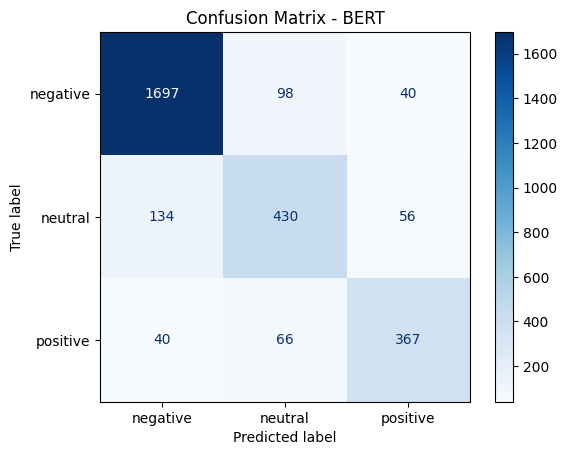

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_dict.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BERT")
plt.show()


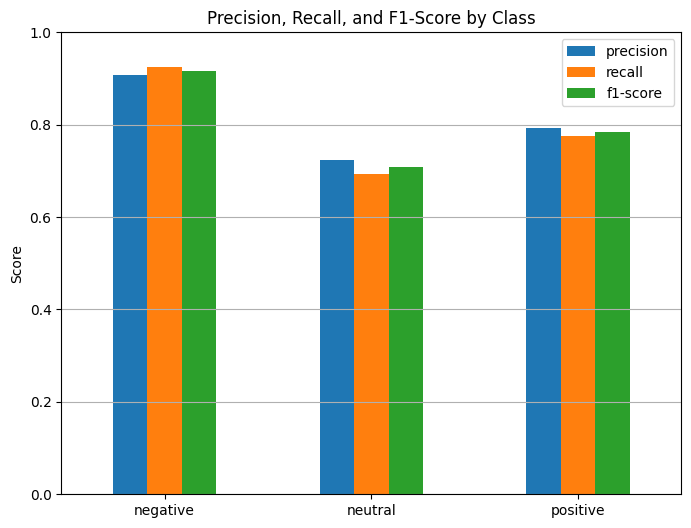

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, preds, target_names=label_dict.keys(), output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,6))
plt.title("Precision, Recall, and F1-Score by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


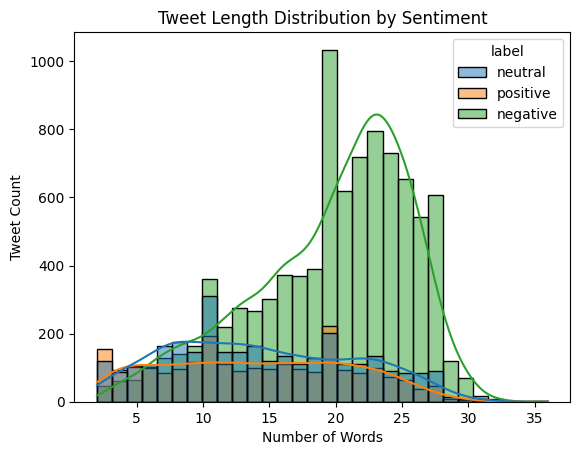

In [ ]:
df['length'] = df['tweet'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='length', hue='label', kde=True, bins=30)
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Tweet Count")
plt.show()


Top 10 keywords for 'negative':
thank, thanks, great, hours, hold, fleek, fleets, awesome, hour, love



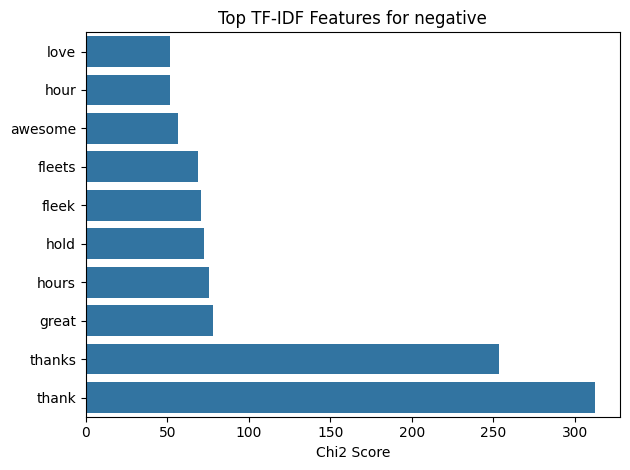

Top 10 keywords for 'neutral':
fleek, fleets, dm, hi, rt, destinationdragons, follow, hours, hold, customer



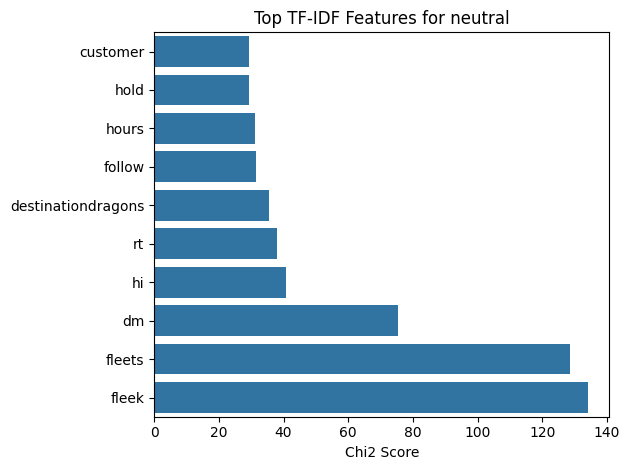

Top 10 keywords for 'positive':
thank, thanks, great, awesome, love, amazing, best, much, appreciate, rock



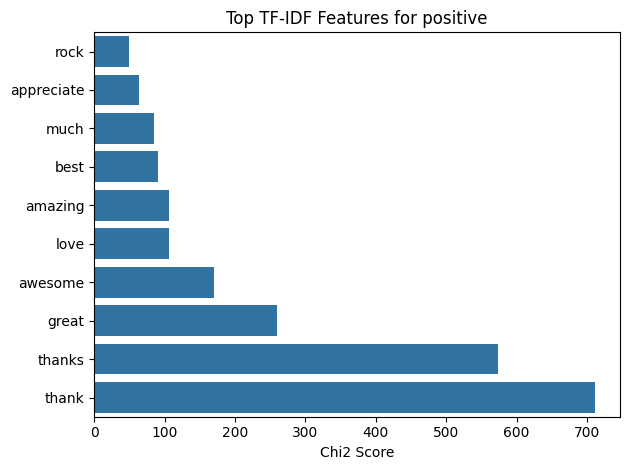

In [ ]:
'''
from sklearn.feature_selection import chi2

for label in label_dict:
    idx = df['label'] == label
    chi2_scores, p_vals = chi2(X_tfidf, idx)
    top_indices = np.argsort(chi2_scores)[-10:]
    top_features = np.array(tfidf.get_feature_names_out())[top_indices]

    print(f"Top 10 keywords for '{label}':")
    print(", ".join(top_features[::-1]))
    print()

    sns.barplot(x=chi2_scores[top_indices], y=top_features, orient='h')
    plt.title(f"Top TF-IDF Features for {label}")
    plt.xlabel("Chi2 Score")
    plt.tight_layout()
    plt.show()
'''

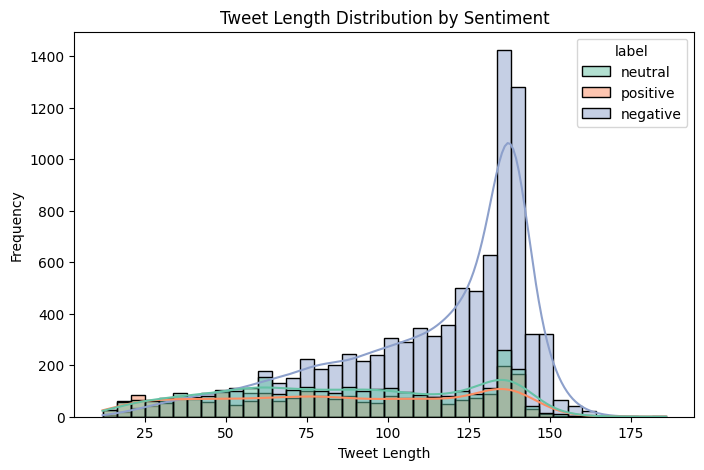

In [ ]:
df['tweet_length'] = df['tweet'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tweet_length', bins=40, kde=True, hue='label', palette='Set2')
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()


<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


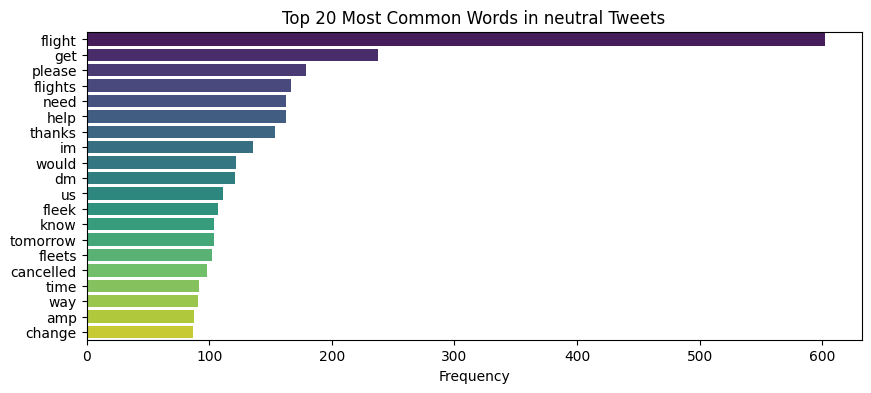

<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


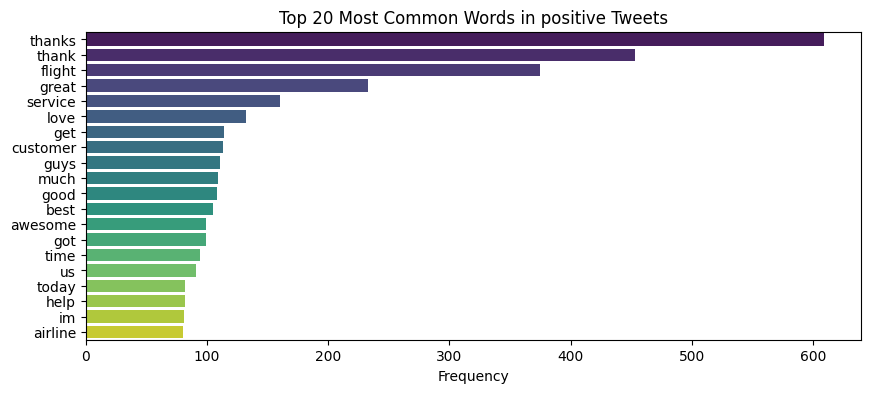

<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


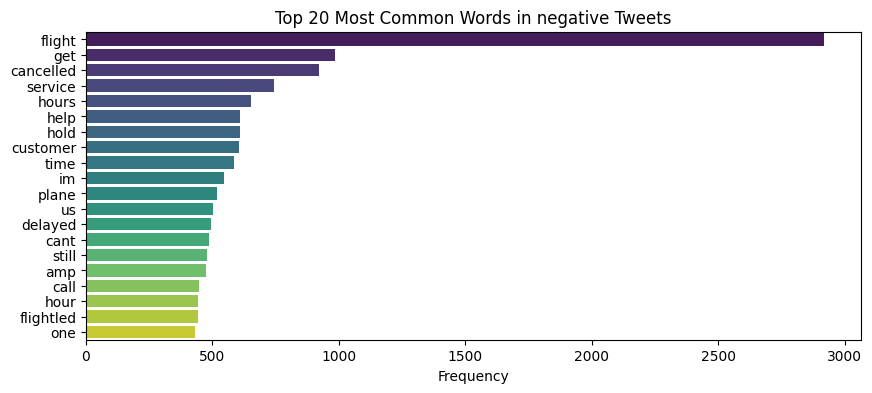

In [ ]:
from collections import Counter
#shows most common words and their counts for each sentiment

def plot_common_words(sentiment, n=20):
    words = " ".join(df[df['label'] == sentiment]['clean_tweet']).split()
    common_words = Counter(words).most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top {n} Most Common Words in {sentiment} Tweets")
    plt.xlabel("Frequency")
    plt.show()

for label in df['label'].unique():
    plot_common_words(label)


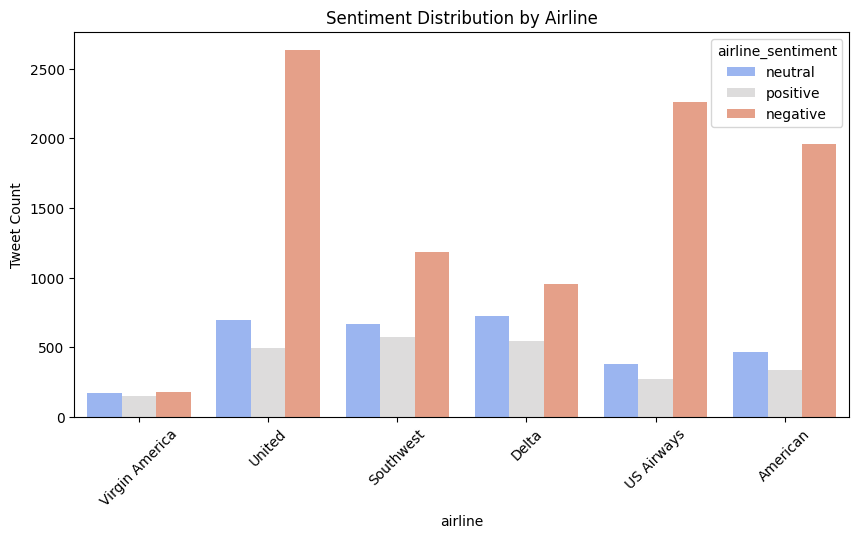

In [ ]:
df_airline = pd.read_csv("Tweets.csv") #with all columns
plt.figure(figsize=(10, 5))
sns.countplot(data=df_airline, x='airline', hue='airline_sentiment', palette='coolwarm')
plt.title("Sentiment Distribution by Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()


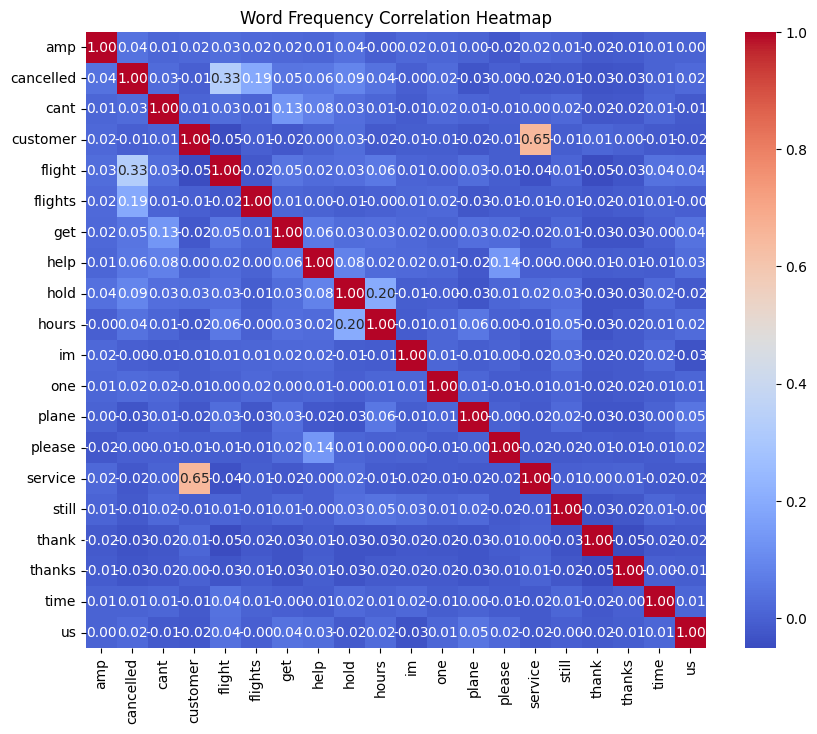

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=20)
X = cv.fit_transform(df['clean_tweet']).toarray()
word_freq_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
correlation = word_freq_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Word Frequency Correlation Heatmap")
plt.show()


-----------------Oversampling data bc there were too many negative ones-----------------------

In [ ]:
!pip install imbalanced-learn


In [ ]:
'''
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_tweet']).toarray()
y = df['label_id']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After SMOTE:", dict(zip(*np.unique(y_train_res, return_counts=True))))



Before SMOTE: {0: 7343, 1: 2479, 2: 1890}
After SMOTE: {0: 7343, 1: 7343, 2: 7343}


In [ ]:
!pip install fastapi uvicorn
!pip install pyngrok  # For ngrok to expose the server externally


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import torch
from transformers import BertTokenizer, BertForSequenceClassification


#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

class TextRequest(BaseModel):
    text: str

app = FastAPI()

#Prediction endpoint
@app.post("/predict")
async def predict_sentiment(request: TextRequest):
    text = request.text

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_id = logits.argmax().item()
        confidence = probs[0][predicted_class_id].item()


    return {"sentiment": class_names[predicted_class_id], "confidence": confidence}



In [ ]:
!pip install nest_asyncio


In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio
nest_asyncio.apply()

ngrok.set_auth_token("2w8nQ00ZgLi3we4M0xYmyV9L2HV_7eSwwBPXkiNbPeKJJvbn6")



In [ ]:
#ngrok tunnel
public_url = ngrok.connect(8000)
print(f"FastAPI app is accessible at {public_url}")

uvicorn.run(app, host="0.0.0.0", port=8000)


FastAPI app is accessible at NgrokTunnel: "https://5e9a-34-127-7-116.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [19050]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [19050]


---------------------Trying on browser----------------------------

In [ ]:
!pip install fastapi nest_asyncio pyngrok uvicorn


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
from pyngrok import ngrok
import uvicorn

nest_asyncio.apply()

app = FastAPI()

In [ ]:
#Pydantic model for input
class TextInput(BaseModel):
  text: str

#Routes
@app.get("/")
def read_root():
  return {"message": "Sentiment analysis API is running!"}

@app.post("/predict/")
def predict_sent(input: TextInput):
    text = input.text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_id = logits.argmax().item()
        confidence = probs[0][predicted_class_id].item()

    return {
        "text": text,
        "predicted_sentiment": class_names[predicted_class_id],
        "confidence": round(confidence, 4)
    }



In [ ]:
!ngrok config add-authtoken "2w8nQ00ZgLi3we4M0xYmyV9L2HV_7eSwwBPXkiNbPeKJJvbn6"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
#public tunnel with ngrok
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://b5ac-34-124-148-38.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [3529]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [3529]


WEB APP

In [ ]:
!pip install fastapi uvicorn pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.4 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from fastapi.responses import HTMLResponse
from pydantic import BaseModel
from transformers import BertTokenizer, BertForSequenceClassification
import torch

app = FastAPI()

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class_names = ['negative', 'neutral', 'positive']

def predict_sentiment(text: str):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_id = logits.argmax().item()
        confidence = probs[0][predicted_class_id].item()

    return class_names[predicted_class_id], confidence

class TextInput(BaseModel):
    text: str

@app.get("/", response_class=HTMLResponse)
def home():
    return """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Sentiment Analysis</title>
    </head>
    <body>
        <h1>Sentiment Analysis (BERT Model)</h1>
        <form id="sentiment-form">
            <textarea id="text" rows="5" cols="50" placeholder="Enter your text here..."></textarea><br><br>
            <button type="submit">Analyze Sentiment</button>
        </form>
        <h2>Result:</h2>
        <p id="result"></p>

        <script>
            document.getElementById('sentiment-form').addEventListener('submit', async function(e) {
                e.preventDefault();
                const text = document.getElementById('text').value;

                const response = await fetch('http://127.0.0.1:8005/predict', {
                    method: 'POST',
                    headers: {'Content-Type': 'application/json'},
                    body: JSON.stringify({text: text})
                });

                const data = await response.json();
                document.getElementById('result').innerText = `Prediction: ${data.prediction}`;
            });
        </script>
    </body>
    </html>
    """

@app.post("/predict")
async def predict(input: TextInput):
    text = input.text
    prediction, confidence = predict_sentiment(text)
    return {"prediction": prediction, "confidence": confidence}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
ngrok.set_auth_token("2w8nQ00ZgLi3we4M0xYmyV9L2HV_7eSwwBPXkiNbPeKJJvbn6")


In [ ]:
from pyngrok import ngrok
import threading
import uvicorn

#Running uvicorn in a background thread
def run():
    uvicorn.run(app, host="0.0.0.0", port=8005)

thread = threading.Thread(target=run)
thread.start()

public_url = ngrok.connect(8005)
print(public_url)


INFO:     Started server process [9417]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8005): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


NgrokTunnel: "https://b476-34-143-191-77.ngrok-free.app" -> "http://localhost:8005"
